# Coordinate Descent is Fast!
> "A simple demonstration of how cool coordinate descent is."
- toc: false
- branch: master
- badges: true
- comments: true
- image: images/CD.png
- hide: false
- search_exclude: false

Coordinate descent (CD) algorithms solve optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes. They have been used in applications for many years, and their popularity continues to grow because of their usefulness in data analysis, machine learning, and other areas of current interest.
<br>

CD methods are the archetype of an almost universal approach to algorithmic optimization: solving an optimization problem by solving a sequence of simpler optimization problems. The obviousness of the CD approach and its acceptable performance in many situations probably account for its longstanding appeal among practitioners. Paradoxically, the apparent lack of sophistication may also account for its unpopularity as a subject for investigation by optimization researchers, who have usually been quick to suggest alternative approaches in any given situation.
<br>

Various applications (including several in computational statistics and machine learning) have yielded problems for which CD approaches are competitive in performance with more reputable alternatives. The properties of these problems (for example, the low cost of calculating one component of the gradient, and the need for solutions of only modest accuracy) lend themselves well to efficient implementations of CD, and CD methods can be adapted well to handle such special features of these applications as nonsmooth regularization terms and a small number of equality constraints. At the same time, there have been improvements in the algorithms themselves and in our understanding of them. Besides their extension to handle the features just mentioned, new variants that make use of randomization and acceleration have been introduced. Parallel implementations that lend themselves well to modern computer architectures have been implemented and analyzed. Perhaps most surprisingly, these developments are relevant even to the most fundamental problem in numerical computation: solving the linear equations Aw = b.
<br>

So let's explore Coordinate Descent with the simplest of cases: plain old linear regression using some of the ever so used mtcars dataset. Recall that the sum of squared residuals is:
<br>

$$RSS = \sum\left(y_i - \sum x_{ij}\beta_j\right)^2$$

Quickly deriving our objective function:

$$ f(\beta ) = argmin \left \| y_i-x_{ij}\beta_j \right \|^2_2 $$

$$ =(y-x\beta)^T(y-x\beta) $$

$$ \hat{\beta} = (x^Tx)^{-1}(x^Ty) $$ aka OLS.

<br>
Now let's do our update steps:

$$ 0 = \bigtriangledown_i f(x) = \beta_j^T(\beta_j x_{ij} + \beta_{j}x_{i-1,j}-y_i) $$

$$ x_{ij} = \frac{\beta_j^T(y_i-\beta_jx_{i-1, j})}{\beta_j^T\beta_j} $$
$$ x_{ij} = \frac{\beta_j^T(residual_{i-1,j})}{\left \| \beta_j \right \|^2} $$

Loading the data and off we go.

In [ ]:
cd_data = loadmat('mtcars.mat')['data']
cd_df = pd.DataFrame(cd_data)

In [ ]:
y = cd_df[0].values
x = cd_df.loc[:, 1:].values

In [ ]:
inter = np.ones(x.shape[0])
X = np.column_stack((inter, x))
X_Normalized = X / np.sqrt(np.sum(np.square(X), axis=0))

Define our loss function

In [ ]:
def loss(b):
    return sum((y - X_Normalized@b)**2) 

Coding the descent from scratch using numpy

In [ ]:
b = np.zeros(X_Normalized.shape[1])
losses = [loss(b)]
iterations = 1
for iteration in range(100):
    r = y - X_Normalized.dot(b)
    for j in range(len(b)):
        r = r + X_Normalized[:, j] * b[j]
        b[j] = X_Normalized[:, j].dot(r)
        r = r - X_Normalized[:, j] * b[j]
    losses.append(loss(b))
    iterations += 1

array([193.44428449, -44.7866386 , -27.77448248, -13.3819371 ])

Text(0.5, 0, 'Iteration')

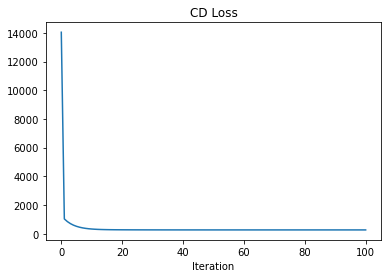

In [ ]:
plt.plot(losses)
plt.title('CD Loss')
plt.xlabel('Iteration')

Our loss function converges almost instantly!

In [ ]:
print("MSE:", sum((y - X_Normalized@b)**2) )

MSE: 261.3695510665015


Just as a sanity check, lets make sure our from scratch implementation produced the same results as sklearn's implementation of linear regression

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [ ]:
reg.fit (X_Normalized, y)
reg.coef_

array([  0.        , -44.66189706, -27.81172298, -13.40793129])